<a href="https://colab.research.google.com/github/AntonisGantzos/Tensorflow-ML_Projects/blob/main/Second_hand_car_prices_prediction_(TensorFlow_Regression_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Second hand car prices prediction v.0
The aim of thi sproject is to create a model that will be able to predict future prices for second hand cars. Our independent values (X) are all the features of the dataset we will be utilizing besides 'current price', which is the dependent variable (y)

In [85]:
import tensorflow as tf
print(tf.__version__)
if tf.__version__ != '2.8.0':
  print("installing version 2.8.0...")
  !pip uninstall tensorflow
  !pip install tensorflow==2.8.0

2.8.0


In [86]:
#model creation
try:
  import tensorflow as tf
  print(f"imported tensorflow {tf.__version__}")
except:
  !pip install tensorflow==2.8.0
  print("installing tensorflow 2.8.0...")
  import tensorflow as tf

import pandas as pd #data processing
import seaborn as sns #data visualization

imported tensorflow 2.8.0


In [87]:
#import dataset from github
#get the file containing the subset
import requests
import zipfile
from pathlib import Path

data_path=Path("/data")

dataset_path=data_path / "second_hand_cars_dataset"

#if the folder does not exist download it and prepare it
if dataset_path.is_dir():
  print(f"{dataset_path} directory already exists")
else:
  print(f"{dataset_path} does not exist, creating directory...")
  dataset_path.mkdir(parents=True, exist_ok=True)


with open(data_path / dataset_path / "data.csv", "wb") as f:
    #we need to get the URL for the raw data of the file
    request = requests.get("https://raw.githubusercontent.com/AntonisGantzos/Tensorflow-ML_Projects/main/data/second_hand_car_train.csv")
    print("Downloading data...")
    f.write(request.content)



/data/second_hand_cars_dataset directory already exists


In [88]:
import io
df=pd.read_csv(data_path/dataset_path/"data.csv") #read the data
df.head() #get a preview of our dataset

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [89]:
df.shape #get the general shape of our data

(1000, 12)

In [90]:
#pairplot provides visual represenation on how each feature's values change accordind to another feature's values
#for example in the last line of the plot we can see how the kilometers values change when the current price increases or decreases
#for more info visit relative documentation : https://seaborn.pydata.org/generated/seaborn.pairplot.html
#df_plot = sns.pairplot(df, diag_kind='kde')
#df_plot

In [91]:
#since our data has been already prepared we move on to creating the tensors for training the model
tensor_data = tf.constant(df)

#convert ot float32 instead of 16 to avoid large numbers being converted to infinity
tensor_data = tf.cast(tensor_data, dtype = tf.float32)

tensor_data, tensor_data.shape, tensor_data.dtype

(<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
 array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
         1.230000e+02, 3.513180e+05],
        [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
         9.500000e+01, 2.850015e+05],
        [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
         9.700000e+01, 2.153860e+05],
        ...,
        [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
         8.900000e+01, 4.058710e+05],
        [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
         1.280000e+02, 7.439800e+04],
        [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
         9.600000e+01, 4.149385e+05]], dtype=float32)>,
 TensorShape([1000, 12]),
 tf.float32)

In [92]:
#it is also necessary to shuffle our data to avoid any potential bias
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[2.440000e+02, 5.335580e+05, 8.471750e+05, 5.000000e+00,
        1.480770e+05, 2.000000e+00, 4.000000e+00, 9.000000e+00,
        1.820000e+02, 1.160000e+02, 1.340000e+02, 9.728050e+04],
       [4.830000e+02, 6.684340e+05, 7.988190e+05, 5.000000e+00,
        6.344800e+04, 1.000000e+00, 9.000000e+00, 1.300000e+01,
        1.730000e+02, 1.000000e+02, 1.380000e+02, 5.080870e+05],
       [9.930000e+02, 5.917760e+05, 8.761920e+05, 4.000000e+00,
        1.481380e+05, 5.000000e+00, 9.000000e+00, 1.000000e+01,
        1.790000e+02, 9.500000e+01, 8.100000e+01, 1.722345e+05],
       [9.270000e+02, 6.215910e+05, 7.200420e+05, 2.000000e+00,
        8.968700e+04, 1.000000e+00, 3.000000e+00, 1.400000e+01,
        1.840000e+02, 7.300000e+01, 1.360000e+02, 3.124690e+05],
       [1.060000e+02, 6.777800e+05, 8.882430e+05, 4.000000e+00,
        6.796800e+04, 1.000000e+00, 1.000000e+00, 1.400000e+01,
        1.650000e+02, 1.190000e+02, 1.210000e+02, 5

In [93]:
#split the data into X and y

X = tensor_data[:, 3:-1]

y = tensor_data[:, 11]
X.shape, y.shape, X[:5], y[:5]
print(f"X and y tensors have been succesfuly created y has shape : {y.shape} and its values have been shaped as shown here : {y[:5]}. X  has shape {X.shape} and its values have been shaped as shown here {X[:5]} \n")

#add a dimension to y so that the tensors shapes match
y= tf.expand_dims(y, axis = -1)
print(f"after adding a dimension to y tensor it now has shape : {y.shape} and its values have been reshaped as shown here : {y[:5]}")

from keras.layers import Normalization
#if tensorflow does not know the mean beforehand it calculates it for each column in the tensor. Same goes for stdv
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

X and y tensors have been succesfuly created y has shape : (1000,) and its values have been shaped as shown here : [ 97280.5 508087.  172234.5 312469.  510929. ]. X  has shape (1000, 8) and its values have been shaped as shown here [[5.00000e+00 1.48077e+05 2.00000e+00 4.00000e+00 9.00000e+00 1.82000e+02
  1.16000e+02 1.34000e+02]
 [5.00000e+00 6.34480e+04 1.00000e+00 9.00000e+00 1.30000e+01 1.73000e+02
  1.00000e+02 1.38000e+02]
 [4.00000e+00 1.48138e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.79000e+02
  9.50000e+01 8.10000e+01]
 [2.00000e+00 8.96870e+04 1.00000e+00 3.00000e+00 1.40000e+01 1.84000e+02
  7.30000e+01 1.36000e+02]
 [4.00000e+00 6.79680e+04 1.00000e+00 1.00000e+00 1.40000e+01 1.65000e+02
  1.19000e+02 1.21000e+02]] 

after adding a dimension to y tensor it now has shape : (1000, 1) and its values have been reshaped as shown here : [[ 97280.5]
 [508087. ]
 [172234.5]
 [312469. ]
 [510929. ]]


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.25549737,  1.6406769 , -0.70466256, -0.5639318 , -1.1774292 ,
         0.7836101 ,  1.5338423 ,  1.4527144 ],
       [ 0.25549737, -1.2639544 , -1.4178838 ,  1.2072109 ,  0.616748  ,
         0.31677446,  0.75360864,  1.6427546 ],
       [-0.3265004 ,  1.6427704 ,  1.4350008 ,  1.2072109 , -0.7288849 ,
         0.62799823,  0.50978565, -1.0653173 ],
       [-1.4904958 , -0.3633811 , -1.4178838 , -0.9181604 ,  1.0652922 ,
         0.8873514 , -0.5630356 ,  1.5477345 ],
       [-0.3265004 , -1.1088192 , -1.4178838 , -1.6266174 ,  1.0652922 ,
        -0.09819059,  1.6801361 ,  0.835084  ]], dtype=float32)>

#Data Normalization

Next step is to normalize our data so that it is normally distributed.
We get rid of our dataset's original units by standardizing the data so that it has a μ=0 and σ=1.

We do this so that we are able to identify a pattern in our dataset and thus predict future values for dependent variable y based on the values of X.

We calculate the Z-Score for each data point of tensor X with the following formula : (X-μ/σ)

μ : mean, the center of the curve
σ : standard deviation, symbolizes the width of the curve

Additional notes on Normal Distribution

- Calculator : https://onlinestatbook.com/2/calculators/normal_dist.html
- Python Normal Distirbution in Statistics : https://www.geeksforgeeks.org/python-normal-distribution-in-statistics/
- Stat Quest Normal Distirbution : https://youtu.be/rzFX5NWojp0?si=X-2WgTabJirzIJUF
- Normal Distirbution explained with examples : https://youtu.be/xI9ZHGOSaCg?si=87VlyYgEO8fAEkvP (highly recommended for revision on the subject)

In [94]:
#it is also needed for the data to be splitted into training and test data
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [95]:
X_train = X[:int(TRAIN_RATIO*DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO*DATASET_SIZE)]
X_test = X[int(TRAIN_RATIO*DATASET_SIZE):int((TRAIN_RATIO+TEST_RATIO)*DATASET_SIZE)]
y_test = y[int(TRAIN_RATIO*DATASET_SIZE):int((TRAIN_RATIO+TEST_RATIO)*DATASET_SIZE)]
X_val = X[int((TRAIN_RATIO+TEST_RATIO)*DATASET_SIZE):]
y_val = y[int((TRAIN_RATIO+TEST_RATIO)*DATASET_SIZE):]
print(f"X_train has shape {X_train.shape} and y_train has shape {y_train.shape}")
print(f"X_test has shape {X_test.shape} and y_test has shape {y_test.shape}")
print(f"X_val has shape {X_val.shape} and y_val has shape {y_val.shape}")

X_train has shape (800, 8) and y_train has shape (800, 1)
X_test has shape (100, 8) and y_test has shape (100, 1)
X_val has shape (100, 8) and y_val has shape (100, 1)


In [96]:
#Combine X_train and y_train into one training dataset
#Reshuffle the data in each iteration and set a batch size for how many records should be given to the model as input each time
#buffer_size means that at any point during the shuffling process, 8 elements are held in the buffer and shuffled.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration = True).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [97]:
#we perform the sam eprocess for validation and testing data
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration = True).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
val_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [98]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration = True).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [99]:
for x,y in train_dataset :
  print(x,y)
  break


tf.Tensor(
[[7.00000e+00 1.45102e+05 1.00000e+00 6.00000e+00 9.00000e+00 1.74000e+02
  6.10000e+01 1.31000e+02]
 [4.00000e+00 9.36300e+04 4.00000e+00 8.00000e+00 1.50000e+01 1.82000e+02
  9.60000e+01 1.35000e+02]
 [5.00000e+00 1.48077e+05 2.00000e+00 4.00000e+00 9.00000e+00 1.82000e+02
  1.16000e+02 1.34000e+02]
 [4.00000e+00 1.48138e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.79000e+02
  9.50000e+01 8.10000e+01]
 [5.00000e+00 6.34480e+04 1.00000e+00 9.00000e+00 1.30000e+01 1.73000e+02
  1.00000e+02 1.38000e+02]
 [2.00000e+00 8.96870e+04 1.00000e+00 3.00000e+00 1.40000e+01 1.84000e+02
  7.30000e+01 1.36000e+02]
 [6.00000e+00 1.17221e+05 5.00000e+00 2.00000e+00 9.00000e+00 1.87000e+02
  7.40000e+01 8.70000e+01]
 [5.00000e+00 6.63450e+04 4.00000e+00 8.00000e+00 1.20000e+01 1.85000e+02
  8.20000e+01 9.20000e+01]
 [6.00000e+00 1.06261e+05 2.00000e+00 9.00000e+00 1.30000e+01 1.57000e+02
  7.20000e+01 9.20000e+01]
 [2.00000e+00 1.15870e+05 3.00000e+00 6.00000e+00 1.20000e+01 1.37000e+02
  7.70

In [100]:
#next step is to create our model
#Use Dense to pass the input to a linear function and make the prediction (y = x*w + b) b=bias of the model and w = weight. We also
#add non-linear acivation functions to our hidden layers o make the model more complex
#we also import optimizers to improve our model's parameters over time
from keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import numpy as np


model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1),])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 32)                288       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,450
Trainable params: 2,433
Non-trainable params: 17
___________________________________________________

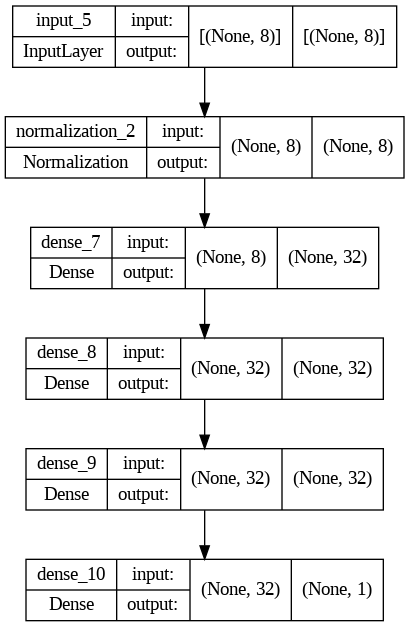

In [101]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [102]:
#next we calculate the loss between the prediction our model makes and the actual value of y
#For outliers we will be using te Mean Absolute Error
#For normal data points we will be using the Mean Squared Error
from keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
model.compile(
    optimizer=Adam(learning_rate= 1),
    loss=tf.keras.losses.MeanAbsoluteError(
    reduction='sum_over_batch_size',
    name='mean_absolute_error'
),
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='root_mean_squared_error'),
        tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error')
    ]
)

#Relative sources on how the different loss functions we can use

- Absolute Error vs Mean Absolute Error vs Mean Squared Error vs Root Mean Squared Error - https://youtu.be/Wk8vycBT4qM?si=s5uvd5zYq_zRtkXC

- Notebook the video above is based on - https://colab.research.google.com/drive/1Pp_ifPR_-6rar-_wY0CdmJYsH_wbCL28?usp=sharing

In [103]:
#next step is training the model
#verbose lets us see the training in real time via logging it
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose =1 )

Epoch 1/100
25/25 [==============================] - 1s 22ms/step - loss: 128108.4297 - root_mean_squared_error: 164209.0312 - mean_absolute_error: 128108.4297 - val_loss: 92372.0312 - val_root_mean_squared_error: 117707.4375 - val_mean_absolute_error: 92372.0312
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 63493.3789 - root_mean_squared_error: 78719.7266 - mean_absolute_error: 63493.3789 - val_loss: 75356.6094 - val_root_mean_squared_error: 92461.9922 - val_mean_absolute_error: 75356.6094
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 64555.0938 - root_mean_squared_error: 79350.5938 - mean_absolute_error: 64555.0938 - val_loss: 49927.8555 - val_root_mean_squared_error: 59219.9609 - val_mean_absolute_error: 49927.8555
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 52264.1406 - root_mean_squared_error: 66112.8828 - mean_absolute_error: 52264.1406 - val_loss: 49575.7852 - val_root_mean_squared_error: 60130.82

In [104]:
#store the loss function's value over epochs
history.history

{'loss': [128108.4296875,
  63493.37890625,
  64555.09375,
  52264.140625,
  45953.625,
  52884.36328125,
  45851.12109375,
  54595.03125,
  41603.76171875,
  46732.90625,
  51630.734375,
  46194.5859375,
  41560.21875,
  43921.96484375,
  40809.78515625,
  40243.9296875,
  48544.25,
  39955.78125,
  42113.8203125,
  46058.3046875,
  42783.13671875,
  41621.8984375,
  40137.953125,
  56820.96484375,
  44831.61328125,
  38167.28125,
  38106.65625,
  42641.578125,
  45039.26953125,
  46583.578125,
  41393.640625,
  48443.21875,
  41417.33984375,
  38578.87890625,
  47680.484375,
  39806.6796875,
  37571.6484375,
  45938.12109375,
  40855.6640625,
  40670.86328125,
  38586.07421875,
  36698.4140625,
  37115.19921875,
  39500.0234375,
  41567.234375,
  41456.296875,
  44147.96484375,
  39244.4375,
  39840.67578125,
  37454.97265625,
  36823.65625,
  35149.63671875,
  37326.546875,
  36474.75390625,
  37546.36328125,
  36297.546875,
  38052.98046875,
  37864.5546875,
  39434.30859375,
  365

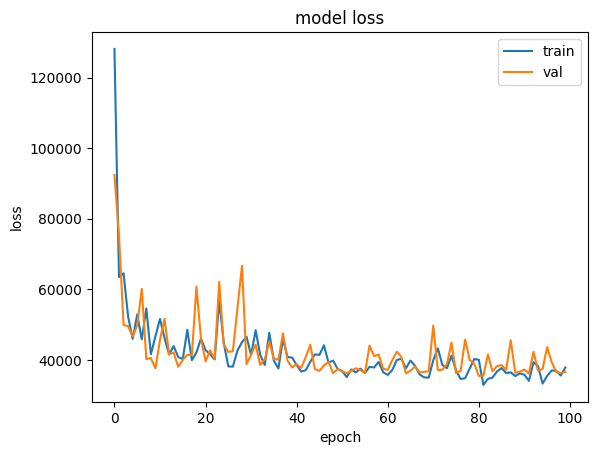

In [105]:
#plot the loss function
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

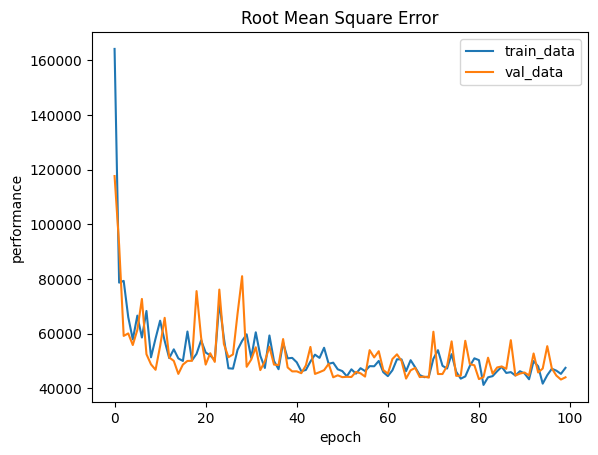

In [106]:
#plot the performance metric
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('Root Mean Square Error')
plt.ylabel('performance')
plt.xlabel('epoch')
plt.legend(['train_data', 'val_data'], loc='upper right')
plt.show()

In [107]:
model.evaluate(X_val, y_val)

4/4 [==============================] - 0s 2ms/step - loss: 36635.2461 - root_mean_squared_error: 44072.7344 - mean_absolute_error: 36635.2461


[36635.24609375, 44072.734375, 36635.24609375]

#Testing our Model

Since the training and evaluation parts of our model are complete we move on to testing it. In this section we will be passing our model data that it has not seen before and make it perform a prediction on that data. We will then also measure its performance

In [108]:
#since we want the model to make a prediction we only pass X_test and then we cross check the predicted values with y_test (the actual values)
y_preds = model.predict(X_test)

In [109]:
y_preds[:5], y_test[:5], y_preds.shape, y_test.shape

(array([[468480.62],
        [288841.44],
        [228538.67],
        [133671.22],
        [132286.38]], dtype=float32),
 <tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[489368. ],
        [179711.5],
        [247277.5],
        [177933.5],
        [ 74398. ]], dtype=float32)>,
 (100, 1),
 TensorShape([100, 1]))

In [110]:
y_pred = list(model.predict(X_test)[:, 0])
y_true = list(y_test[:, 0])
y_pred, y_true

([468480.62,
  288841.44,
  228538.67,
  133671.22,
  132286.38,
  466659.12,
  172491.78,
  250842.78,
  423937.84,
  374980.94,
  346593.38,
  193305.77,
  468100.28,
  342495.53,
  137080.97,
  328023.34,
  506188.9,
  389754.2,
  211520.81,
  224667.55,
  392633.34,
  438993.16,
  364704.97,
  129796.46,
  272852.2,
  244662.47,
  114573.805,
  322010.56,
  500501.44,
  500534.66,
  134095.38,
  246869.42,
  444005.56,
  190340.8,
  342897.34,
  229624.1,
  400520.62,
  529350.1,
  290425.62,
  272422.6,
  153850.52,
  370317.7,
  432051.6,
  474518.56,
  287069.88,
  342621.75,
  391126.88,
  374902.22,
  168000.06,
  157907.02,
  304365.3,
  213973.8,
  436811.2,
  400123.62,
  214937.66,
  263659.97,
  390713.8,
  343053.0,
  217496.89,
  164402.69,
  202091.62,
  334373.6,
  432317.1,
  234006.84,
  495552.62,
  227882.66,
  224332.92,
  171352.38,
  421083.75,
  127926.21,
  285928.9,
  420833.53,
  156217.16,
  346276.16,
  360011.7,
  214864.23,
  484456.16,
  201622.92,
  3

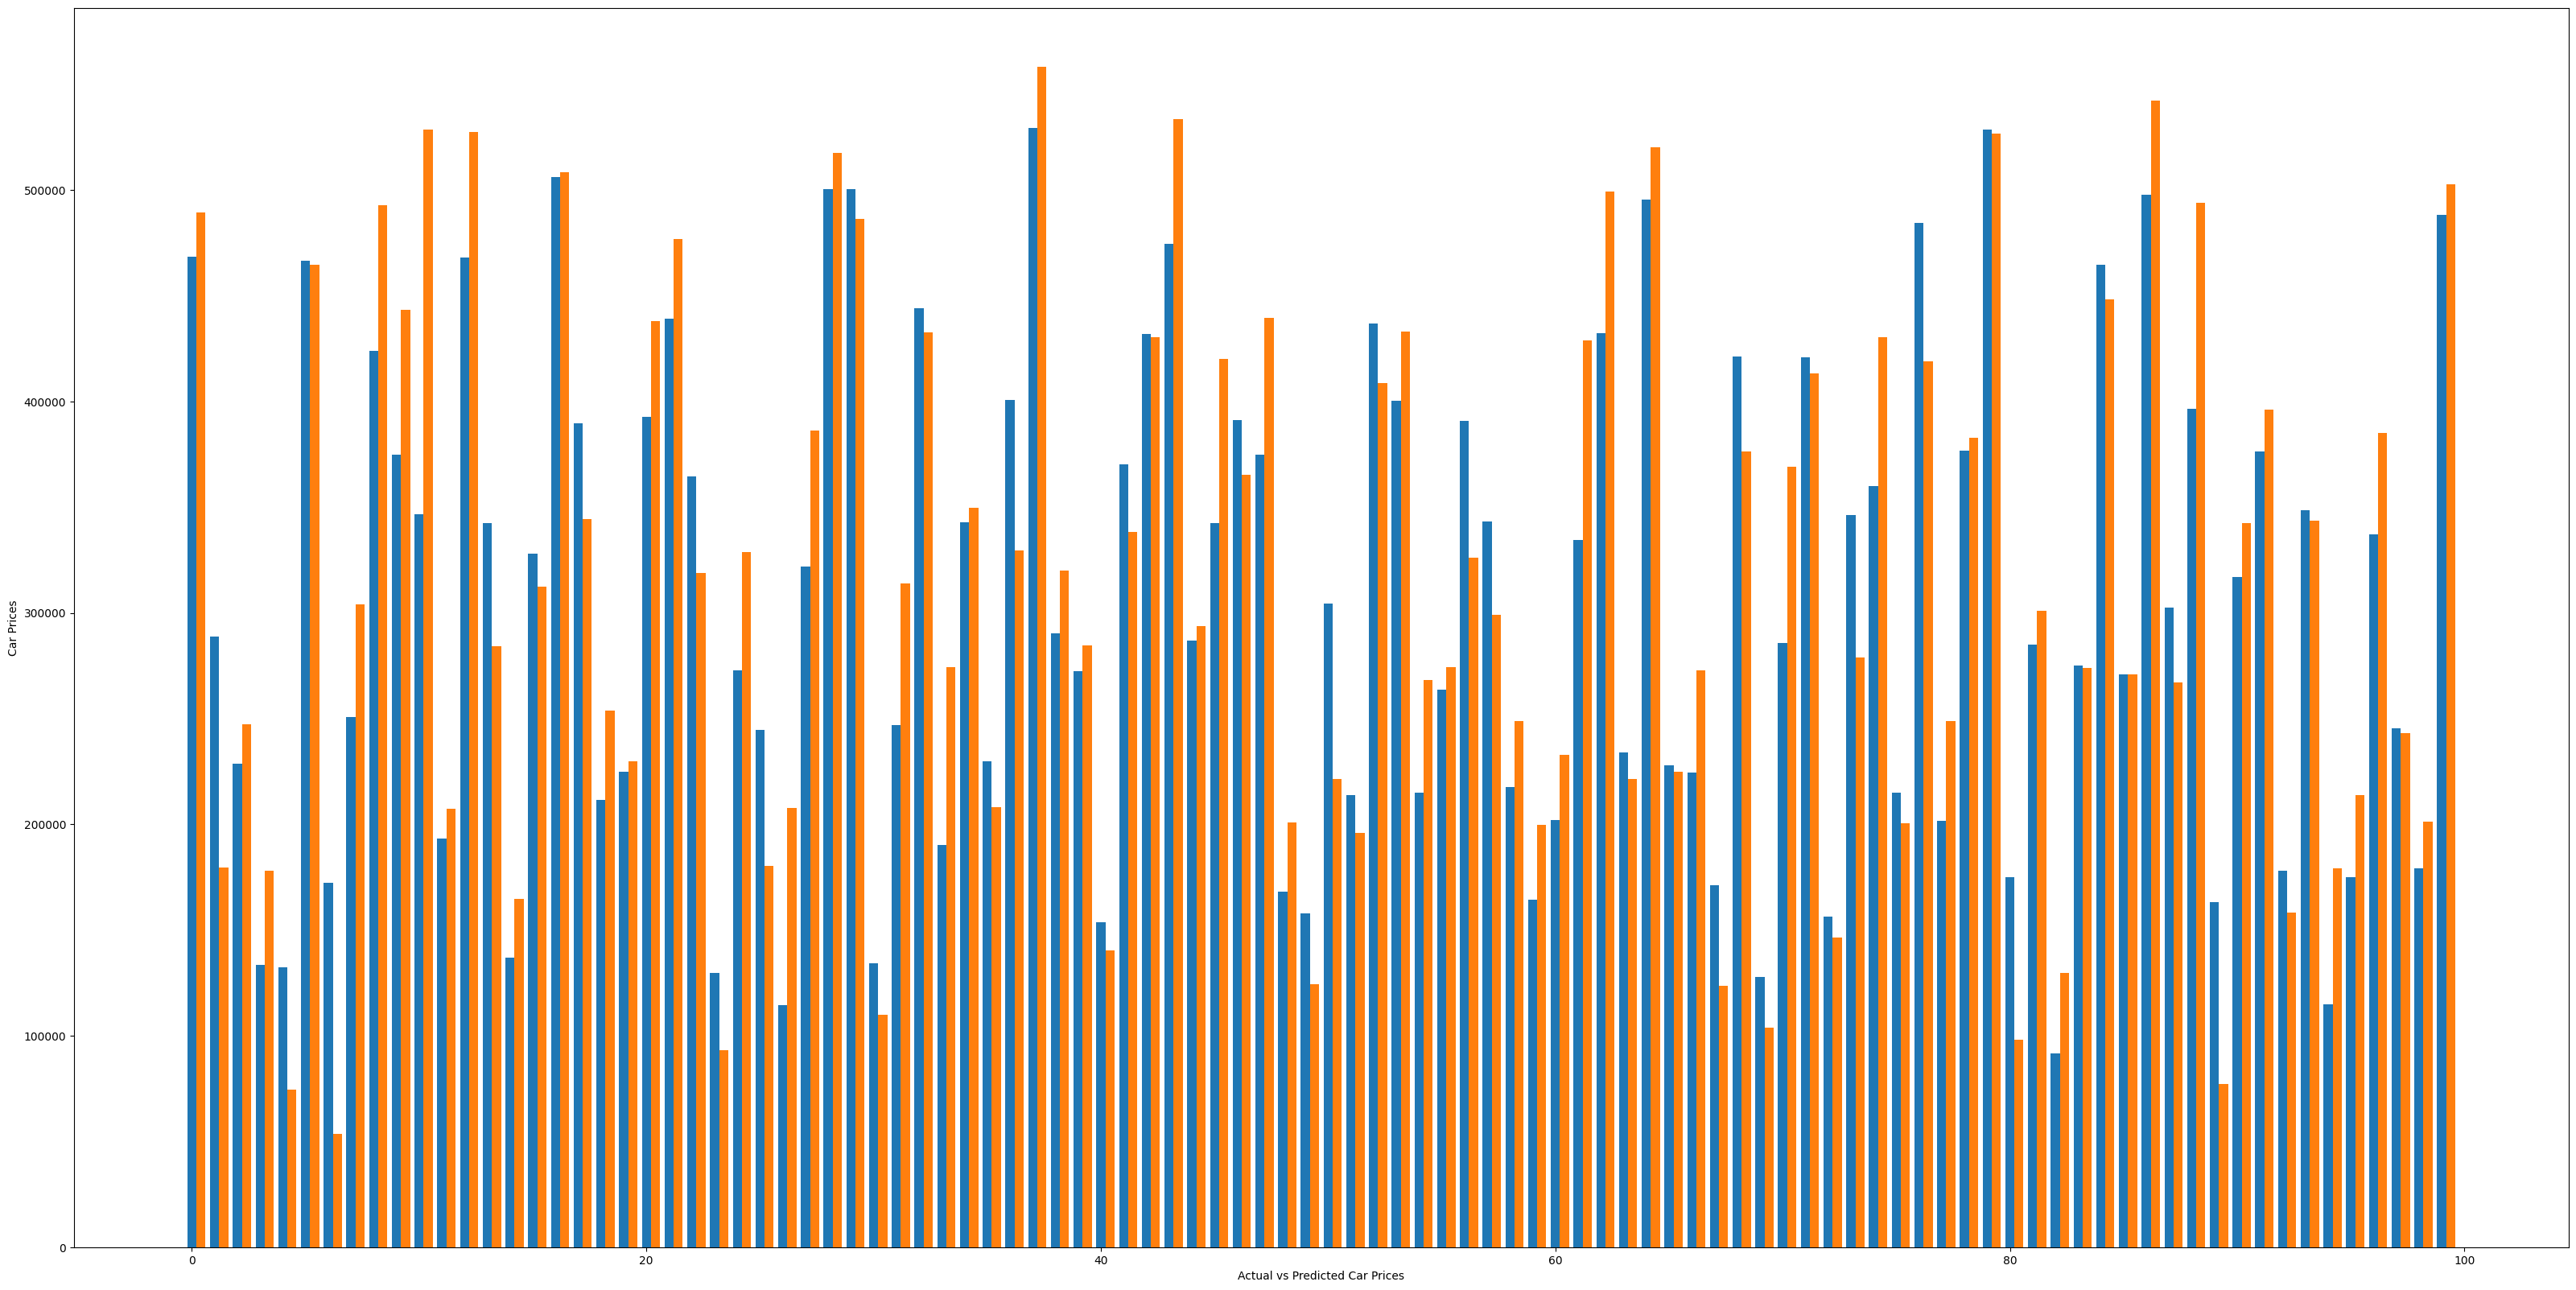

In [111]:
#plot the results
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.4
plt.bar(ind, y_pred, width, label='predicted')
plt.bar(ind+width, y_true, width, label='actual')

plt.xlabel('Actual vs Predicted Car Prices')
plt.ylabel('Car Prices')
plt.show()